<a href="https://colab.research.google.com/github/hokoro/Big-Data-Statistics-Analysis/blob/main/Statics1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np

## pandas 정의 

- csv 파일 읽어 오기 
df = pd.read_csv(path = '파일경로' , index_col = '인덱스 컬럼 이름')



In [3]:
df = pd.read_csv('/content/ch1_sport_test.csv',index_col = '학생번호')

In [5]:
df.head() # df 에서 5가지 행을 보여주는 head 함수 

,학년,악력,윗몸일으키기,점수,순위
학생번호,,,,,
1,1,40.2,34,15,4
2,1,34.2,14,7,10
3,1,28.8,27,11,7
4,2,39.0,27,14,5
5,2,50.9,32,17,2


In [7]:
df.shape

(10, 5)

In [8]:
df['악력'].shape

(10,)

In [10]:
%precision 3 
pd.set_option('precision',3)

In [11]:
df = pd.read_csv('/content/ch2_scores_em.csv', index_col = 'student number')

In [12]:
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [17]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [18]:
scores_df = pd.DataFrame({'score':scores},index = pd.Index(['A','B','C','D','E','F','G','H','I','J'], name = 'student'))

In [19]:
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


###평균값
 - 총합 / 데이터의수 
 - sum(data) / len(data)



In [21]:
print(len(scores))
print(sum(scores))
print(sum(scores) / len(scores))

10
550
55.0


In [22]:
np.mean(scores)

55.000

In [24]:
scores_df.mean()['score']

55.000

## 중앙값 
데이터를 정렬 한 상태에서 중앙에 위치 한 값 


np.median(data) 

scores_df.median()

In [25]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [26]:
n =  len(sorted_scores)
if n % 2 == 0:
  m0 = sorted_scores[n//2 - 1]
  m1 = sorted_scores[n//2]
  median = (m0 + m1)/2

else:
  median = sorted_scores[(n+1)//2 - 1]

median

56.500

In [27]:
np.median(scores)

56.500

In [29]:
scores_df.median()['score']

56.500

## 최빈값

해당 배열에서 많은 숫자가 존재 하는 값 

pd.DataFrame.mode()

or 

pd.Series.mode() 

In [30]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [31]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

## 편차

- 각 데이터가 평균으로 부터 떨어진 정도 

In [32]:
mean = np.mean(scores)
deviation = scores - mean #넘파이는 반복문을 사용하지 않고 바로 연산이 가능하다 
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

## 분산 
- 산포드의 지표의 편차의 평균은 항상 0 

In [34]:
np.mean(deviation ** 2)

86.000

In [35]:
np.var(scores)

86.000

In [36]:
scores_df.var()

score    95.556
dtype: float64

## 표준 편차 

- 분산의 제곱근을 취한 것이 표준 편차

In [37]:
np.sqrt(np.var(scores,ddof = 0))

9.274

In [38]:
np.std(scores,ddof = 0)

9.274

## 범위 
- 최대값과 최솟값 만으로 산포도 표현

In [39]:
np.max(scores) - np.min(scores)

28

In [40]:
scores_df['score'].max()

69

In [41]:
scores_df['score'].min()

41

In [42]:
scores_df['score'].max() - scores_df['score'].min()

28

## 사분위 범위 

- 데이터의 하위 25% 50% 75% 에 위치하는 값은 1사분위수 , 2사분위수 , 3사분위수 

- 사분위 범위   IQR = Q3 - Q1 

In [43]:
Q1 = np.percentile(scores,25)
Q3 = np.percentile(scores,75)
IQR = Q3 - Q1 

In [47]:
IQR

15.000

In [45]:
pd.Series(scores).describe()['25%']

48.250

In [46]:
pd.Series(scores).describe()['75%']

63.250

In [48]:
pd.Series(scores).describe()['75%'] - pd.Series(scores).describe()['25%']

15.000

In [54]:
scores_df.describe()['score']['75%'] - scores_df.describe()['score']['25%']

15.000

## 정규화 
- 상대적 결과가 다르므로 통일된 지표로 변환하는 정규화 
- 데이터에서 평균을 뺴고 표준 편차로 나누는 작업
- 표준화된 데이터는 표준화 변량 혹인 점수 
- 표준화된 데이터는 평균이 0 표준편차가 1 

In [70]:
z = (scores - np.mean(scores)) / int(np.std(scores))

In [71]:
z

array([-1.444,  1.556,  0.111, -1.556,  0.222, -0.778,  1.111, -0.667,
        1.111,  0.333])

In [66]:
print(scores_df['score'] , scores)

student
A    42
B    69
C    56
D    41
E    57
F    48
G    65
H    49
I    65
J    58
Name: score, dtype: int64 [42 69 56 41 57 48 65 49 65 58]


In [65]:
print(scores_df['score'].mean() , np.mean(scores))

55.0 55.0


In [64]:
print(scores_df['score'].std(),np.std(scores))

9.775252199076787 9.273618495495704


In [67]:
z2 = (scores_df['score'] - scores_df['score'].mean()) / int(scores_df['score'].std())

In [68]:
z2

student
A   -1.444
B    1.556
C    0.111
D   -1.556
E    0.222
F   -0.778
G    1.111
H   -0.667
I    1.111
J    0.333
Name: score, dtype: float64

In [72]:
np.mean(z)

0.000

In [73]:
np.std(z , ddof = 0)

1.030

## 도수 분포표 
- 데이터의 분포 상태를 세부적으로 알고 싶을 떄 , 데이터가 취하는 값을 구간으로 나누고 , 각 구간에 데이터가 들어가는가 하는 방법

- 계급  = 시험 점수를 10점 간격으로 나눌떄 0~10점 구간 나누는 방법

- 도수 = 각 계급에 속한 학생 수 

- 계급폭 = 각 구간의 폭 , 10점 
- 계급수 = 계급의수 , 10 

In [75]:
freq , _  = np.histogram(scores , bins = 10 , range = (0,100))

In [76]:
freq

array([0, 0, 0, 0, 4, 3, 3, 0, 0, 0])

In [77]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_class

['0~10',
 '10~20',
 '20~30',
 '30~40',
 '40~50',
 '50~60',
 '60~70',
 '70~80',
 '80~90',
 '90~100']

In [86]:
freq_dist_df = pd.DataFrame({'frequency':freq} ,index = pd.Index(freq_class , name = 'class'))

In [80]:
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,0
40~50,4
50~60,3
60~70,3
70~80,0
80~90,0


## 계급값 
- 각 계급을 대표하는 값으로 계급의 중앙값을 이용

In [82]:
class_value = [(i+(i+10)) // 2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

## 상대 도수 
- 전체 데이터에 대해서 해당 계급의 데이터가 차지하는 비율

In [83]:
rel_freq = freq / freq.sum()
rel_freq

array([0. , 0. , 0. , 0. , 0.4, 0.3, 0.3, 0. , 0. , 0. ])

## 누적 상대 고수 
- 해당 계급 까지의 상대 도수의 합 

In [84]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0. , 0. , 0. , 0. , 0.4, 0.7, 1. , 1. , 1. , 1. ])

In [89]:
freq_dist_df['class_value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq


In [90]:
freq_dist_df

,frequency,class_value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.0,0.0
10~20,0,15,0.0,0.0
20~30,0,25,0.0,0.0
30~40,0,35,0.0,0.0
40~50,4,45,0.4,0.4
50~60,3,55,0.3,0.7
60~70,3,65,0.3,1.0
70~80,0,75,0.0,1.0
80~90,0,85,0.0,1.0


## 최빈값

- 최대가 되게 하는 계급값

In [92]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class_value']
#빈도수가 4 이므로 최대 인 45 인 값이 최빈값

45

## 히스토그램 시각화 

In [93]:
import matplotlib.pyplot as plt 
%matplotlib inline

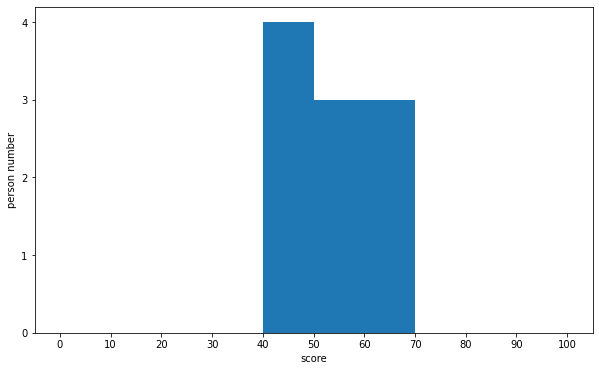

In [98]:
fig  = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

freq,_,_ = ax.hist(scores , bins = 10 , range = (0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
#plt.show()

## 상자그림 

데이터의 분포를 이상값으로 시각적으로 파악 가능

### 이상값 

Q1 - 1.5 * IQR 값 

Q3 + 1.5 * IQR 값 


까지 확인 가능 하다 

In [99]:
flg = plt.figure(figsize = (5,6))
ax = fig.add_subplot(111)
ax.boxplot(scores , labels = ['score'])

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<Figure size 360x432 with 0 Axes>